<a href="https://colab.research.google.com/github/SamuelBFG/ga-fading/blob/main/SmallScaleFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !unzip mmwave-data.zip

Archive:  mmwave-data.zip
replace SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt  
replace SSF_dB_mmdata_pathBA_2KHz/mainfile_load_data.m? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
from scipy import special as sp

plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

## Set up directories
paths = ['plots', 
            'plots/gen/', 
        ]
for i in paths:
    if not os.path.exists(i):
        os.makedirs(i)

## Data Load

In [3]:
def mmdata_pathAB_dB():   
  ap_1 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_2 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_3 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_4 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_5 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_6 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_7 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_8 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_9 = pd.read_csv('/content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def mmdata_pathAB_linear():   
  ap_1 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_2 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_3 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_4 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_5 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_6 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_7 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_8 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_9 = pd.read_csv('/content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def mmdata_pathBA_dB():   
  ap_1 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_2 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_3 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_4 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_5 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_6 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_7 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_8 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_9 = pd.read_csv('/content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def mmdata_pathBA_linear():   
  ap_1 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_2 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_3 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_4 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_5 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_6 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_7 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_8 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
  ap_9 = pd.read_csv('/content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
pathAB_dB = pd.DataFrame()
pathAB_dB['AP1'], pathAB_dB['AP2'], pathAB_dB['AP3'], pathAB_dB['AP4'], pathAB_dB['AP5'], pathAB_dB['AP6'], pathAB_dB['AP7'], pathAB_dB['AP8'], pathAB_dB['AP9'] = mmdata_pathAB_dB()
pathAB_linear = pd.DataFrame()
pathAB_linear['AP1'], pathAB_linear['AP2'], pathAB_linear['AP3'], pathAB_linear['AP4'], pathAB_linear['AP5'], pathAB_linear['AP6'], pathAB_linear['AP7'], pathAB_linear['AP8'], pathAB_linear['AP9'] = mmdata_pathAB_linear()


######################
#### LOAD PATH BA ####
######################
pathBA_dB = pd.DataFrame()
pathBA_dB['AP1'], pathBA_dB['AP2'], pathBA_dB['AP3'], pathBA_dB['AP4'], pathBA_dB['AP5'], pathBA_dB['AP6'], pathBA_dB['AP7'], pathBA_dB['AP8'], pathBA_dB['AP9'] = mmdata_pathBA_dB()
pathBA_linear = pd.DataFrame()
pathBA_linear['AP1'], pathBA_linear['AP2'], pathBA_linear['AP3'], pathBA_linear['AP4'], pathBA_linear['AP5'], pathBA_linear['AP6'], pathBA_linear['AP7'], pathBA_linear['AP8'], pathBA_linear['AP9'] = mmdata_pathBA_linear()

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-0.696300,-0.706977,-0.950157,-0.649444,-0.671172,-1.023778,-0.975409,-0.890574,-1.067207
std,3.827021,3.843941,4.345763,3.608783,3.657521,4.609185,4.428430,4.217900,4.628232
min,-28.257000,-26.160000,-30.613000,-26.990000,-29.916000,-29.998000,-27.744000,-24.949000,-26.882000
25%,-2.003200,-2.086100,-2.829525,-1.817875,-1.925500,-3.061450,-3.032250,-2.724975,-3.256600
50%,0.017756,-0.086271,-0.148310,-0.047697,-0.012861,-0.149310,-0.141100,-0.180765,-0.253520
75%,1.553000,1.488500,1.844975,1.316550,1.431450,1.974400,1.982550,1.821300,2.012050
max,8.209900,9.598300,9.200100,10.698000,9.334600,8.803300,9.140200,9.140100,9.516400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,0.998078,0.999170,0.994459,0.996652,0.996119,0.998034,0.996456,0.996790,0.996149
std,0.346952,0.361394,0.406651,0.340052,0.342458,0.428794,0.417400,0.402380,0.439500
min,0.038648,0.049204,0.029467,0.044717,0.031928,0.031630,0.041001,0.056568,0.045280
25%,0.794040,0.786490,0.721980,0.811160,0.801170,0.702955,0.705320,0.730723,0.687333
50%,1.002000,0.990120,0.983070,0.994525,0.998520,0.982960,0.983890,0.979400,0.971230
75%,1.195800,1.186900,1.236625,1.163675,1.179200,1.255200,1.256400,1.233275,1.260675
max,2.573300,3.019400,2.884100,3.426900,2.929100,2.755300,2.864200,2.864200,2.991000


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.141164,-1.154185,-1.201912,-1.197784,-1.120310,-1.244764,-1.132814,-1.108337,-1.219527
std,4.811502,4.821488,4.949272,4.950949,4.758712,5.050291,4.790806,4.782434,5.034982
min,-27.320000,-27.572000,-29.529000,-28.736000,-30.499000,-31.529000,-26.868000,-28.713000,-29.627000
25%,-3.625500,-3.761550,-3.749250,-3.664900,-3.414300,-3.908400,-3.468750,-3.467175,-3.835200
50%,-0.280440,-0.366350,-0.327530,-0.265050,-0.282530,-0.364120,-0.316615,-0.214105,-0.305010
75%,2.210025,2.240700,2.276500,2.249450,2.210200,2.357300,2.133950,2.137500,2.370900
max,10.524000,10.389000,10.315000,9.950700,9.385600,9.530000,10.148000,9.653300,10.109000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,0.997566,0.998390,0.998292,0.996041,0.994971,0.997650,0.996580,0.998705,0.999811
std,0.457868,0.468088,0.473801,0.460772,0.442697,0.477986,0.454135,0.453083,0.476423
min,0.043050,0.041821,0.033383,0.036578,0.029857,0.026520,0.045353,0.036673,0.033011
25%,0.658760,0.648515,0.649440,0.655775,0.674970,0.637650,0.670752,0.670878,0.643050
50%,0.968230,0.958700,0.962990,0.969950,0.968000,0.958950,0.964205,0.975650,0.965490
75%,1.289700,1.294300,1.299650,1.295600,1.289800,1.311800,1.278500,1.279025,1.313800
max,3.358700,3.307100,3.279200,3.144400,2.946300,2.995700,3.216800,3.038600,3.202300


In [59]:
def KappaMuPDF(r, kappa, mu, omega):
  '''
  kappa-mu pdf.
  '''
  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
  B = (r / np.sqrt(omega))**(mu)
  C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
  D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

  pdf = A * B * C * D
  return pdf

def shadowedKappaMuPDF(r, kappa, mu, omega, md):
  '''
  shadowed kappa-mu pdf.
  '''
  A = 2 * r**((2*mu) -1) / omega**(mu)
  B = (mu**mu * md**md * (1+kappa)**mu) / (sp.gamma(mu) * ((mu*kappa)+md)**md)
  C = np.exp((- mu * (1+kappa) * r**2) / omega)
  D = (mu**2) * kappa * (1+kappa) * (r**2)
  E = ((mu*kappa)+md) * omega
  F = sp.hyp1f1(md, mu, D / E)

  pdf = A * B * C * F
  return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD


def fitness(X, Y, fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = KappaMuPDF(X, kappa, mu, omega)
    n = len(Y)
    cost = 1/n * sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = KappaMuPDF(X, kappa, mu, omega)/np.sum(KappaMuPDF(X, kappa, mu, omega))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost

def getDensityEstimationSamples(linear_data, nExtractedSamples):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  
  logkde = kde.score_samples(Xdata)
  Ydata = np.exp(logkde).reshape(-1,1)
  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Xdata), Ydata, c='magenta')
  plt.ylabel('Density')
  plt.xlabel('Small Scale Fading (dB)')
  plt.grid()
  plt.show()
  return Xdata, Ydata

In [46]:
def geneticAlgorithm_km(X, Y):#, mleResults):
  '''
  Genetic Algorithm incorporating Kappa Mu in the Fitness Function
  It fits kappa, mu, omega
  '''
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.1, 100.0), # kappa
                        random.uniform(0.1, 1.0), # mu
                        random.uniform(0.1, 2.0))) # r_hat^2

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      rankedSolutions.append( (fitness(X, Y, fitnessType, s[0],s[1],s[2]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}\n')

    # plt.figure(figsize=((10,7)))
    # plt.plot(20*np.log10(X), KappaMuPDF(X, rankedSolutions[0][1][0], rankedSolutions[0][1][1], rankedSolutions[0][1][2]), label='Predicted')
    # plt.scatter(20*np.log10(X), Y, color='m', label='Real')
    # plt.plot(20*np.log10(X), KappaMuPDF(X, mleResults[0], mleResults[1], mleResults[2]), label='Nidhi\'s MLE')
    # plt.title(f'=== Generation: {i} === ')
    # plt.legend()
    # plt.grid(True)
    # plt.xlabel(r'$\rho=r/\hat{r}$')
    # plt.ylabel('pdf')
    # if savePlots: 
    #   plt.savefig(f'plots/gen/gen_{i}.png')
    
    # if showPlots:
    #   plt.show()
    #   plt.clf()
    # else: 
    #   plt.clf()

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%
      newGen.append((e1,e2,e3))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
      # print()
      # print('='*10)
      print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}'.format(bestParams[0],bestParams[1],bestParams[2]))

      return bestParams[0],bestParams[1],bestParams[2]

In [47]:
def fitness_sku(X, Y, fitnessType, kappa, mu, omega, md):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Shadowed Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = shadowedKappaMuPDF(X, kappa, mu, omega, md)
    n = len(Y)
    sum = []
    for val in (Y-y_pred):
      sum.append(val**2)
    sum = np.sum(sum)
    cost = 1/n * sum
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = shadowedKappaMuPDF(X, kappa, mu, omega, md)/np.sum(shadowedKappaMuPDF(X, kappa, mu, omega, md))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_sku(X, Y, mleResults):
  '''
  Genetic Algorithm incorporating Shadowed Kappa Mu in the Fitness Function
  It fits kappa, mu, omega, md
  '''
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.01, 10), # kappa
                        random.uniform(0.1, 1.0), # mu
                        random.uniform(0.1, 1.0), # r_hat^2
                        random.uniform(0.1, 1.0))) # md

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      rankedSolutions.append( (fitness_sku(X, Y, fitnessType, s[0],s[1],s[2],s[3]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    print(f'=== Generation: {i} === ')
    print(f'Fitness: {rankedSolutions[0][0]}')
    print('Best individual:')
    print(f'Kappa: {rankedSolutions[0][1][0]}')
    print(f'Mu: {rankedSolutions[0][1][1]}')
    print(f'Omega: {rankedSolutions[0][1][2]}')
    print(f'Md: {rankedSolutions[0][1][3]}\n')

    plt.figure(figsize=((10,7)))
    plt.plot(20*np.log10(X), shadowedKappaMuPDF(X, rankedSolutions[0][1][0], rankedSolutions[0][1][1], rankedSolutions[0][1][2], rankedSolutions[0][1][3]), label='Predicted')
    plt.scatter(20*np.log10(X), Y, color='m', label='Real')
    plt.plot(20*np.log10(X), shadowedKappaMuPDF(X, mle_shadowed_kappa_mu[0], mle_shadowed_kappa_mu[1], mle_shadowed_kappa_mu[2], mle_shadowed_kappa_mu[3]), label='Nidhi\'s MLE')
    plt.title(f'=== Generation: {i} === ')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'$\rho=r/\hat{r}$')
    plt.ylabel('pdf')
    if savePlots: 
      plt.savefig(f'plots/gen/gen_{i}.png')
    
    if showPlots:
      plt.show()
      plt.clf()
    else: 
      plt.clf()

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 
    elements_md = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])
      elements_md.append(s[1][3])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%
      e4 = random.choice(elements_md) * random.uniform(0.975,1.025) # Mutation of 5%
      
      newGen.append((e1,e2,e3,e4))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
      # print()
      # print('='*10)
      print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}\nMd: {}'.format(bestParams[0],bestParams[1],bestParams[2],bestParams[3]))

      return bestParams[0],bestParams[1],bestParams[2],bestParams[3]

## Small Scale Fading Fitting

In [54]:
### PARAMETERS
nMaxGen = 50
nPopulation = 1000
savePlots = True
showPlots = False
nExtractedSamples = 81

### AP1

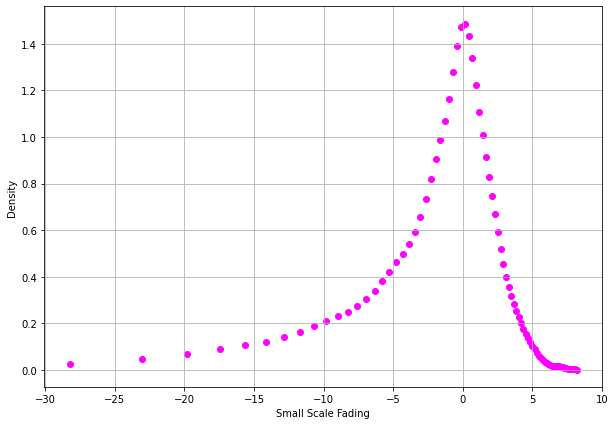

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


Max number of generations exceeded!

Best Fitness: [169.3561605]
Best Gen: 5
Kappa: 30.83284541747429
Mu: 0.18829769250395997
Omega: 1.0913449270424085


In [55]:
nAP = 'AP1'
Xdata, Ydata = getDensityEstimationSamples(pathAB_linear[nAP].dropna(), nExtractedSamples)
fitnessType = 'MSE'
kappa_hat_mse, mu_hat_mse, omega_hat_mse = geneticAlgorithm_km(Xdata, Ydata)
# kappa_hat_rad, mu_hat_rad, omega_hat_rad = geneticAlgorithm_km(Xdata, Ydata, mle_kappa_mu[nAP])

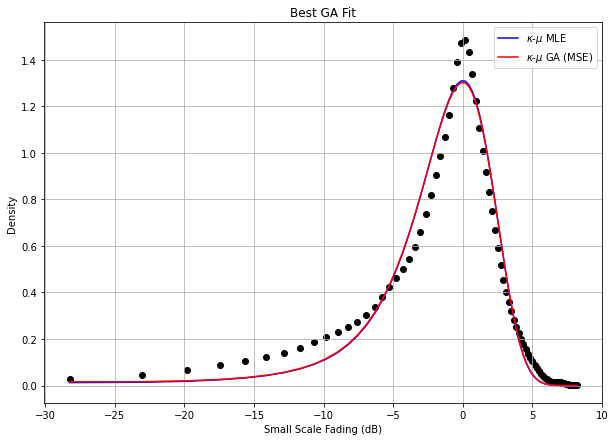

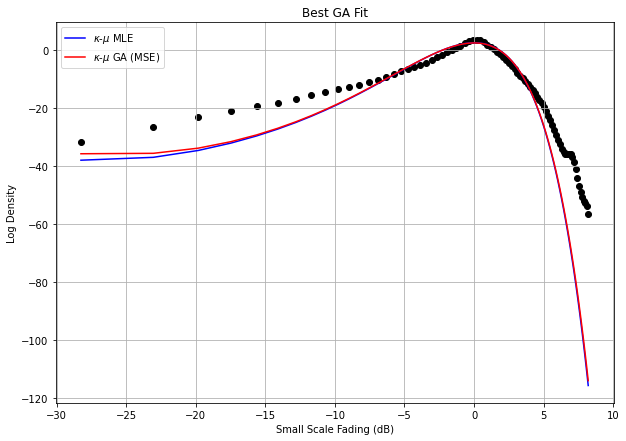

In [58]:
mleResults_ap1 = [60.0747320167390, 0.100000000000035, 1.09085912951657]
k_u_pdf = KappaMuPDF(Xdata, mleResults_ap1[0], mleResults_ap1[1], mleResults_ap1[2])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), k_u_pdf, c='blue', label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, kappa_hat_mse, mu_hat_mse, omega_hat_mse), label='$\kappa$-$\mu$ GA (MSE)', c='red')
plt.title(f'Best GA Fit')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(k_u_pdf), c='blue', label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, kappa_hat_mse, mu_hat_mse, omega_hat_mse)), label='$\kappa$-$\mu$ GA (MSE)', c='red')
plt.title(f'Best GA Fit')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

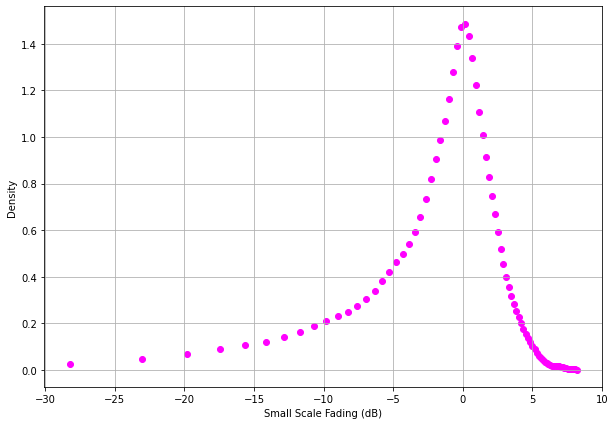

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


Max number of generations exceeded!

Best Fitness: 75.31699005057988
Best Gen: 15
Kappa: 7.449259796174452
Mu: 0.5373001597258663
Omega: 1.1126161347048518


In [60]:
nAP = 'AP1'
Xdata, Ydata = getDensityEstimationSamples(pathAB_linear[nAP].dropna(), nExtractedSamples)
fitnessType = 'RAD'
kappa_hat_rad, mu_hat_rad, omega_hat_rad = geneticAlgorithm_km(Xdata, Ydata)
# kappa_hat_rad, mu_hat_rad, omega_hat_rad = geneticAlgorithm_km(Xdata, Ydata, mle_kappa_mu[nAP])

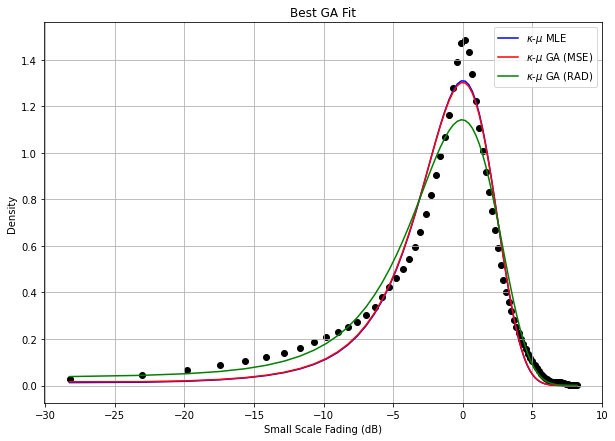

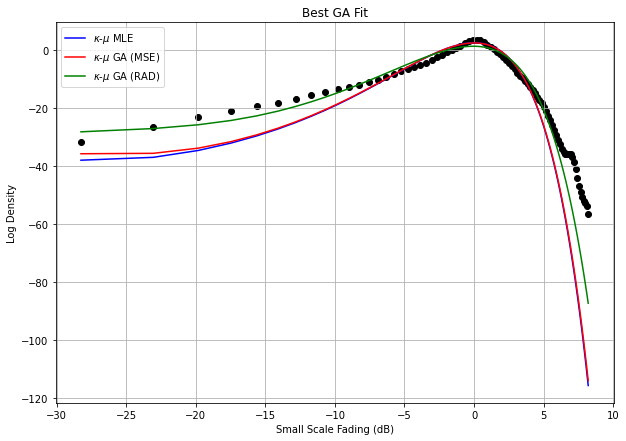

In [63]:
mleResults_ap1 = [60.0747320167390, 0.100000000000035, 1.09085912951657]
k_u_pdf = KappaMuPDF(Xdata, mleResults_ap1[0], mleResults_ap1[1], mleResults_ap1[2])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), k_u_pdf, c='blue', label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, kappa_hat_mse, mu_hat_mse, omega_hat_mse), label='$\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, kappa_hat_rad, mu_hat_rad, omega_hat_rad), label='$\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Best GA Fit')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(k_u_pdf), c='blue', label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, kappa_hat_mse, mu_hat_mse, omega_hat_mse)), label='$\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, kappa_hat_rad, mu_hat_rad, omega_hat_rad)), label='$\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Best GA Fit')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

### AP2

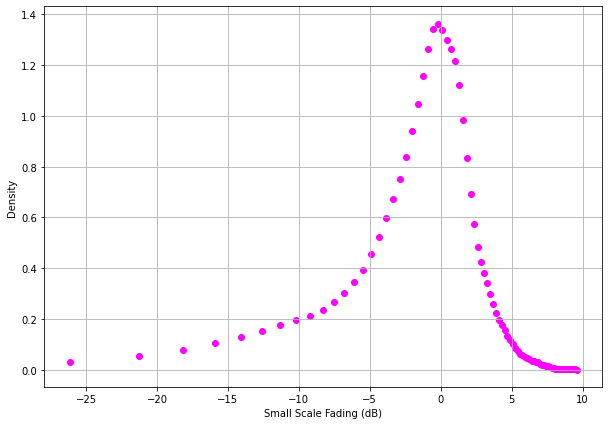

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


Max number of generations exceeded!

Best Fitness: [268.63937898]
Best Gen: 42
Kappa: 48.74941402113821
Mu: 0.1164902037833199
Omega: 1.062116368650514


In [64]:
nAP = 'AP2'
Xdata, Ydata = getDensityEstimationSamples(pathAB_linear[nAP].dropna(), nExtractedSamples)
fitnessType = 'MSE'
kappa_hat_mse, mu_hat_mse, omega_hat_mse = geneticAlgorithm_km(Xdata, Ydata)
# kappa_hat_rad, mu_hat_rad, omega_hat_rad = geneticAlgorithm_km(Xdata, Ydata, mle_kappa_mu[nAP])

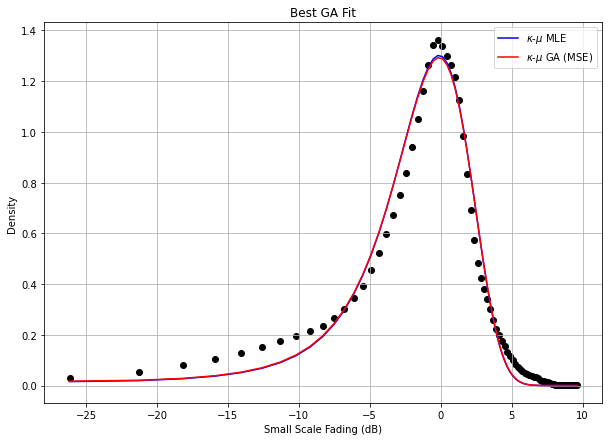

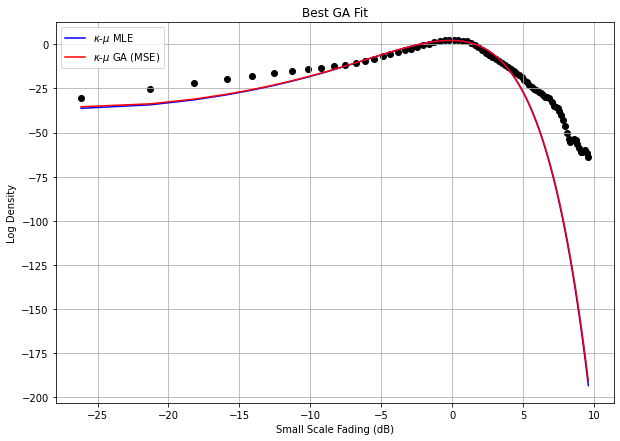

In [68]:
mleResults_ap2 = [57.7090372687841, 00.100000000000035, 1.06068939836177]
k_u_pdf = KappaMuPDF(Xdata, mleResults_ap2[0], mleResults_ap2[1], mleResults_ap2[2])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), k_u_pdf, c='blue', label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, kappa_hat_mse, mu_hat_mse, omega_hat_mse), label='$\kappa$-$\mu$ GA (MSE)', c='red')
plt.title(f'Best GA Fit')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(k_u_pdf), c='blue', label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, kappa_hat_mse, mu_hat_mse, omega_hat_mse)), label='$\kappa$-$\mu$ GA (MSE)', c='red')
plt.title(f'Best GA Fit')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

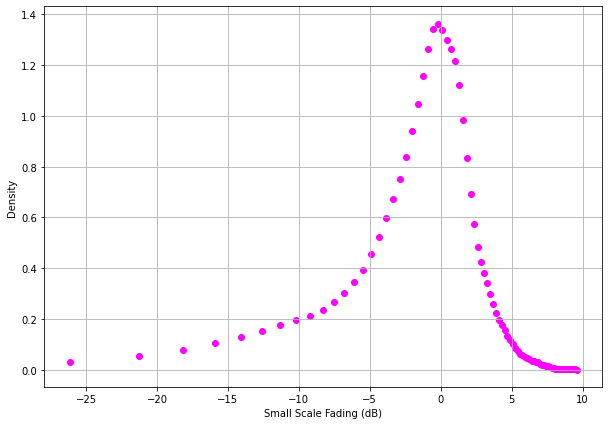

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


Max number of generations exceeded!

Best Fitness: 49.52211557858117
Best Gen: 5
Kappa: 3.423989838593034
Mu: 0.8816128153040292
Omega: 1.1178081146422167


In [67]:
nAP = 'AP2'
Xdata, Ydata = getDensityEstimationSamples(pathAB_linear[nAP].dropna(), nExtractedSamples)
fitnessType = 'RAD'
kappa_hat_rad, mu_hat_rad, omega_hat_rad = geneticAlgorithm_km(Xdata, Ydata)
# kappa_hat_rad, mu_hat_rad, omega_hat_rad = geneticAlgorithm_km(Xdata, Ydata, mle_kappa_mu[nAP])

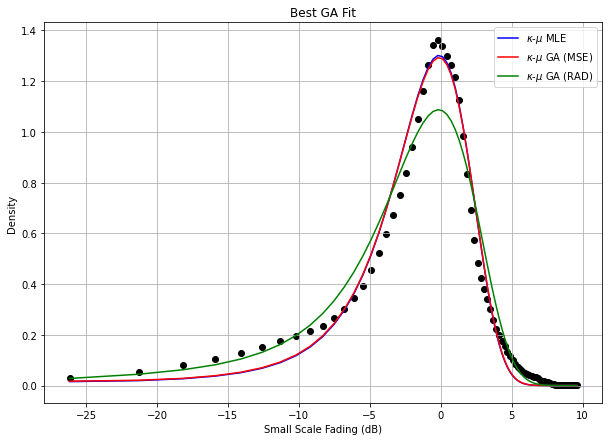

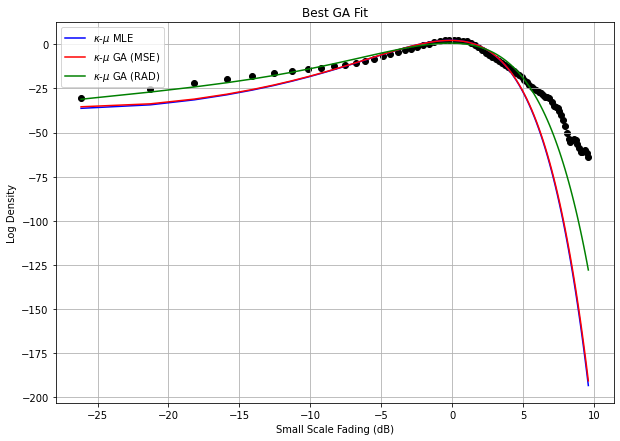

In [69]:
mleResults_ap2 = [57.7090372687841, 00.100000000000035, 1.06068939836177]
k_u_pdf = KappaMuPDF(Xdata, mleResults_ap2[0], mleResults_ap2[1], mleResults_ap2[2])

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), k_u_pdf, c='blue', label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, kappa_hat_mse, mu_hat_mse, omega_hat_mse), label='$\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, kappa_hat_rad, mu_hat_rad, omega_hat_rad), label='$\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Best GA Fit')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(k_u_pdf), c='blue', label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, kappa_hat_mse, mu_hat_mse, omega_hat_mse)), label='$\kappa$-$\mu$ GA (MSE)', c='red')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, kappa_hat_rad, mu_hat_rad, omega_hat_rad)), label='$\kappa$-$\mu$ GA (RAD)', c='green')
plt.title(f'Best GA Fit')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()